# Master SMT

# Sustainable Finance


# I- Portfolio optimization with Scipy


## Import


In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize, LinearConstraint

import math


## Load Data


### Returns 2005-2020


In [3]:
# Monthly returns from MSCI EUROPE
#Ret= pd.read_excel("C:\\Users\\lvallee1\\OneDrive - Université de Lausanne\\Bureau\\Paper_1\\Data\\return_50.xlsx", engine='openpyxl')

Ret = pd.read_excel('./return_50.xlsx')
# MSCI Weights
#W = pd.read_excel("C:\\Users\\lvallee1\\OneDrive - Université de Lausanne\\Bureau\\Paper_1\\Data\\weight_50.xlsx", engine='openpyxl')
# W=W.iloc[:,1:]


In [4]:
# Nb of companies : 45
Ret.set_index("Unnamed: 0", inplace=True)
Ret.index.name = "Date"
Ret


,AEGON,ANGLO AMERICAN,ATOS,BAE SYSTEMS,BANCO SANTANDER,BARRY CALLEBAUT,BBV.ARGENTARIA,BP,BRITISH LAND,CARREFOUR,...,STORA ENSO R,SWISS RE,THALES,UBS GROUP,UNIBAIL RODAMCO WE STAPLED UNITS,UNITED UTILITIES GROUP,VOLKSWAGEN PREF.,WARTSILA,WPP,ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,-0.005538,-0.017607,-0.054719,0.046328,-0.043019,-0.037259,-0.044284,0.011402,-0.050848,0.082526,...,-0.059634,-0.040840,-0.050150,-0.032160,-0.241129,-0.001229,0.069468,0.064292,-0.009890,-0.002325
2005-02-28,0.067140,0.074864,0.138121,0.064662,0.054240,0.074070,0.030007,0.106070,0.022181,0.018189,...,0.059647,0.076173,-0.004515,0.073655,0.045690,-0.010888,0.028970,0.149849,0.059006,0.111438
2005-03-31,-0.064897,-0.030937,-0.072429,-0.005331,-0.017737,-0.045041,-0.059082,-0.042317,-0.084770,0.013530,...,-0.039745,-0.023904,-0.078999,-0.027498,-0.039183,-0.002138,-0.013782,0.060723,-0.013013,-0.047517
2005-04-29,-0.059146,-0.064958,-0.111227,0.016803,-0.045746,0.070538,-0.045835,-0.015977,0.028343,-0.068199,...,-0.057974,-0.077676,-0.030994,-0.026942,0.041487,0.016348,-0.091025,-0.003185,-0.049650,-0.043610
2005-05-31,0.029797,0.078373,0.030066,0.006602,-0.009285,0.037693,0.019677,-0.007196,0.015510,0.027867,...,-0.003491,-0.043337,0.013450,-0.033253,0.038471,0.019688,0.027173,0.142419,-0.009519,-0.010414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.033642,0.011080,0.012770,0.110723,0.041663,0.064022,-0.059199,-0.007296,0.019038,0.008380,...,0.169819,0.022686,0.079615,0.037691,-0.092150,-0.057834,0.144493,0.023377,0.159525,0.003685
2020-09-30,-0.066989,-0.011705,-0.069533,-0.104337,-0.158022,0.003695,-0.051883,-0.176995,-0.109187,-0.004562,...,0.063602,-0.078667,-0.039555,-0.080954,-0.200958,-0.005892,-0.035989,-0.048538,-0.090700,-0.058866
2020-10-30,0.035827,-0.034288,-0.153944,-0.158713,0.062358,-0.073517,0.031006,-0.126863,0.033355,-0.028853,...,-0.069808,-0.034939,-0.134872,0.035924,0.114837,0.009037,-0.067589,0.008695,0.029661,-0.049846


## Covariance Matrix - Rolling window


In [4]:
# Estimation of 10-year covariance matrices from 2005-2020 with monthly data
# Monthly rebalancing : each  month estimate a new covariance matrix
# Total nb of observations over the period: 12 months x 16 years = 192
# Nb of 10-year covariance matrices to estimate: 12 months x 6 years + 1(first cov matrix) = 73
# 1 covariance matrix from Jan2005 to Dec2014 and as many covariance matrices as months from Janv2015 to Dec2020 (= 72 months)
# Use the rolling window function


In [5]:
# Window size: 120 months

years = 10
months_in_years = 12
window_size = years*months_in_years

Covar = Ret.rolling(window_size).cov()
Covar


AEGON  ANGLO AMERICAN      ATOS  \
Date                                                                    
2005-01-31 AEGON                        NaN             NaN       NaN   
           ANGLO AMERICAN               NaN             NaN       NaN   
           ATOS                         NaN             NaN       NaN   
           BAE SYSTEMS                  NaN             NaN       NaN   
           BANCO SANTANDER              NaN             NaN       NaN   
...                                     ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP  0.000747        0.001207  0.001614   
           VOLKSWAGEN PREF.        0.005819        0.004949  0.004001   
           WARTSILA                0.003798        0.002967  0.003370   
           WPP                     0.004334        0.002655  0.003346   
           ZURICH INSURANCE GROUP  0.003383        0.002104  0.002335   

                                   BAE SYSTEMS  BANCO SANTANDER  \
Date                                                              
2005-01-31 AEGON                           NaN              NaN   
           ANGLO AMERICAN                  NaN              NaN   
           ATOS                            NaN              NaN   
           BAE SYSTEMS                     NaN              NaN   
           BANCO SANTANDER                 NaN              NaN   
...                                        ...              ...   
2020-12-31 UNITED UTILITIES GROUP     0.001098         0.001364   
           VOLKSWAGEN PREF.           0.003110         0.006268   
           WARTSILA                   0.001976         0.003812   
           WPP                        0.002813         0.004370   
           ZURICH INSURANCE GROUP     0.002012         0.003825   

                                   BARRY CALLEBAUT  BBV.ARGENTARIA        BP  \
Date                                                                           
2005-01-31 AEGON                               NaN             NaN       NaN   
           ANGLO AMERICAN                      NaN             NaN       NaN   
           ATOS                                NaN             NaN       NaN   
           BAE SYSTEMS                         NaN             NaN       NaN   
           BANCO SANTANDER                     NaN             NaN       NaN   
...                                            ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP         0.001221        0.001407  0.001381   
           VOLKSWAGEN PREF.               0.002003        0.005850  0.003552   
           WARTSILA                       0.001256        0.003717  0.002602   
           WPP                            0.001459        0.004388  0.002820   
           ZURICH INSURANCE GROUP         0.000988        0.003818  0.002490   

                                   BRITISH LAND  CARREFOUR  ...  STORA ENSO R  \
Date                                                        ...                 
2005-01-31 AEGON                            NaN        NaN  ...           NaN   
           ANGLO AMERICAN                   NaN        NaN  ...           NaN   
           ATOS                             NaN        NaN  ...           NaN   
           BAE SYSTEMS                      NaN        NaN  ...           NaN   
           BANCO SANTANDER                  NaN        NaN  ...           NaN   
...                                         ...        ...  ...           ...   
2020-12-31 UNITED UTILITIES GROUP      0.002496   0.000777  ...      0.001336   
           VOLKSWAGEN PREF.            0.005276   0.003884  ...      0.005738   
           WARTSILA                    0.003400   0.002504  ...      0.003537   
           WPP                         0.004438   0.002556  ...      0.004189   
           ZURICH INSURANCE GROUP      0.002516   0.002260  ...      0.002785   

                                   SWISS RE    THALES  UBS GROUP  \
Date                                                 

- Multi-index dataframe
- We now want to extract the first cov matrix


In [6]:
# Starting from this date
Covar.loc["2014-12-31":]


AEGON  ANGLO AMERICAN      ATOS  \
Date                                                                    
2014-12-31 AEGON                   0.013519        0.006639  0.007502   
           ANGLO AMERICAN          0.006639        0.011424  0.005387   
           ATOS                    0.007502        0.005387  0.010636   
           BAE SYSTEMS             0.004090        0.003041  0.003144   
           BANCO SANTANDER         0.008565        0.006647  0.005569   
...                                     ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP  0.000747        0.001207  0.001614   
           VOLKSWAGEN PREF.        0.005819        0.004949  0.004001   
           WARTSILA                0.003798        0.002967  0.003370   
           WPP                     0.004334        0.002655  0.003346   
           ZURICH INSURANCE GROUP  0.003383        0.002104  0.002335   

                                   BAE SYSTEMS  BANCO SANTANDER  \
Date                                                              
2014-12-31 AEGON                      0.004090         0.008565   
           ANGLO AMERICAN             0.003041         0.006647   
           ATOS                       0.003144         0.005569   
           BAE SYSTEMS                0.004132         0.003436   
           BANCO SANTANDER            0.003436         0.010362   
...                                        ...              ...   
2020-12-31 UNITED UTILITIES GROUP     0.001098         0.001364   
           VOLKSWAGEN PREF.           0.003110         0.006268   
           WARTSILA                   0.001976         0.003812   
           WPP                        0.002813         0.004370   
           ZURICH INSURANCE GROUP     0.002012         0.003825   

                                   BARRY CALLEBAUT  BBV.ARGENTARIA        BP  \
Date                                                                           
2014-12-31 AEGON                          0.004134        0.008986  0.004460   
           ANGLO AMERICAN                 0.002934        0.006592  0.004894   
           ATOS                           0.002612        0.005944  0.003681   
           BAE SYSTEMS                    0.001473        0.003097  0.002048   
           BANCO SANTANDER                0.002911        0.010051  0.004143   
...                                            ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP         0.001221        0.001407  0.001381   
           VOLKSWAGEN PREF.               0.002003        0.005850  0.003552   
           WARTSILA                       0.001256        0.003717  0.002602   
           WPP                            0.001459        0.004388  0.002820   
           ZURICH INSURANCE GROUP         0.000988        0.003818  0.002490   

                                   BRITISH LAND  CARREFOUR  ...  STORA ENSO R  \
Date                                                        ...                 
2014-12-31 AEGON                       0.003955   0.005152  ...      0.008027   
           ANGLO AMERICAN              0.003609   0.003520  ...      0.006256   
           ATOS                        0.003710   0.002780  ...      0.005823   
           BAE SYSTEMS                 0.002163   0.002020  ...      0.003028   
           BANCO SANTANDER             0.004304   0.004941  ...      0.007458   
...                                         ...        ...  ...           ...   
2020-12-31 UNITED UTILITIES GROUP      0.002496   0.000777  ...      0.001336   
           VOLKSWAGEN PREF.            0.005276   0.003884  ...      0.005738   
           WARTSILA                    0.003400   0.002504  ...      0.003537   
           WPP                         0.004438   0.002556  ...      0.004189   
           ZURICH INSURANCE GROUP      0.002516   0.002260  ...      0.002785   

                                   SWISS RE    THALES  UBS GROUP  \
Date                                                 

In [7]:
Covar = Ret.rolling(window_size).cov().dropna()
Covar


AEGON  ANGLO AMERICAN      ATOS  \
Date                                                                    
2014-12-31 AEGON                   0.013519        0.006639  0.007502   
           ANGLO AMERICAN          0.006639        0.011424  0.005387   
           ATOS                    0.007502        0.005387  0.010636   
           BAE SYSTEMS             0.004090        0.003041  0.003144   
           BANCO SANTANDER         0.008565        0.006647  0.005569   
...                                     ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP  0.000747        0.001207  0.001614   
           VOLKSWAGEN PREF.        0.005819        0.004949  0.004001   
           WARTSILA                0.003798        0.002967  0.003370   
           WPP                     0.004334        0.002655  0.003346   
           ZURICH INSURANCE GROUP  0.003383        0.002104  0.002335   

                                   BAE SYSTEMS  BANCO SANTANDER  \
Date                                                              
2014-12-31 AEGON                      0.004090         0.008565   
           ANGLO AMERICAN             0.003041         0.006647   
           ATOS                       0.003144         0.005569   
           BAE SYSTEMS                0.004132         0.003436   
           BANCO SANTANDER            0.003436         0.010362   
...                                        ...              ...   
2020-12-31 UNITED UTILITIES GROUP     0.001098         0.001364   
           VOLKSWAGEN PREF.           0.003110         0.006268   
           WARTSILA                   0.001976         0.003812   
           WPP                        0.002813         0.004370   
           ZURICH INSURANCE GROUP     0.002012         0.003825   

                                   BARRY CALLEBAUT  BBV.ARGENTARIA        BP  \
Date                                                                           
2014-12-31 AEGON                          0.004134        0.008986  0.004460   
           ANGLO AMERICAN                 0.002934        0.006592  0.004894   
           ATOS                           0.002612        0.005944  0.003681   
           BAE SYSTEMS                    0.001473        0.003097  0.002048   
           BANCO SANTANDER                0.002911        0.010051  0.004143   
...                                            ...             ...       ...   
2020-12-31 UNITED UTILITIES GROUP         0.001221        0.001407  0.001381   
           VOLKSWAGEN PREF.               0.002003        0.005850  0.003552   
           WARTSILA                       0.001256        0.003717  0.002602   
           WPP                            0.001459        0.004388  0.002820   
           ZURICH INSURANCE GROUP         0.000988        0.003818  0.002490   

                                   BRITISH LAND  CARREFOUR  ...  STORA ENSO R  \
Date                                                        ...                 
2014-12-31 AEGON                       0.003955   0.005152  ...      0.008027   
           ANGLO AMERICAN              0.003609   0.003520  ...      0.006256   
           ATOS                        0.003710   0.002780  ...      0.005823   
           BAE SYSTEMS                 0.002163   0.002020  ...      0.003028   
           BANCO SANTANDER             0.004304   0.004941  ...      0.007458   
...                                         ...        ...  ...           ...   
2020-12-31 UNITED UTILITIES GROUP      0.002496   0.000777  ...      0.001336   
           VOLKSWAGEN PREF.            0.005276   0.003884  ...      0.005738   
           WARTSILA                    0.003400   0.002504  ...      0.003537   
           WPP                         0.004438   0.002556  ...      0.004189   
           ZURICH INSURANCE GROUP      0.002516   0.002260  ...      0.002785   

                                   SWISS RE    THALES  UBS GROUP  \
Date                                                 

In [11]:
# Dataframe with multiple indexes
display(len(Covar.index.levels))

2

In [12]:
# Use get_level_values function to get Date from the multiIndex dataframe
Covar.index.get_level_values('Date')


DatetimeIndex(['2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31',
               ...
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=3285, freq=None)

In [13]:
# Use set function to drop duplicates
set(Covar.index.get_level_values('Date').tolist())


{Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-01-30 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-30 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-29 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-29 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-

In [15]:
# Sort dates in chronological order
dates = sorted(list(set(Covar.index.get_level_values('Date').tolist())))
dates


[Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-01-30 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-30 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-29 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-29 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-

In [16]:
len(dates)


73

In [13]:
# Check is all the eigenvalues pf matrix are positive, if so the matrix is positive definite
answer = []
for date in dates:
    a = np.all(np.linalg.eigvals(Covar.loc[date]) > 0)
    answer.append(a)
answer


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

## Minimum variance optimization


### Scipy Doc

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


### Optimization


In [27]:
# Create empty lists to stock your results
optimal_W = []  # Optimal weights
Var = []  # Variance

dates = sorted(list(set(Covar.index.get_level_values('Date').tolist())))

# Define the objective function (minimum variance)
for date in dates:
    def objectiveFunction(x): return x.T @ Covar.loc[date] @ x # @ matrix multiplication
    #objectiveFunction = lambda x: np.dot(x.T, np.dot(Covar.loc[date], x))

    # Set initial weights (equally weighted portfolio)
    numberOfAssets = Ret.shape[1] # number of columns = number of assets
    x0 = np.ones(numberOfAssets)/numberOfAssets 

    # Define constraints: positivity and budget
    bounds = tuple((0,1) for x in range(numberOfAssets))
    budgetConstraint = LinearConstraint(np.ones(numberOfAssets), 1, 1) # Budget constraint
    constraints = [budgetConstraint]

    # Solve the optimization
    #results = minimize(objectiveFunction, x0, constraints=constraints)
    results = minimize(objectiveFunction, x0, bounds=bounds, constraints = constraints)

    # Store the optimized weights
    wOptimized = pd.Series(results.x, index=Ret.columns) # index=Ret.columns : gives the name of the company
    optimal_W.append(wOptimized)

    # Store the min variances
    min_var = results.fun
    Var.append(min_var*months_in_years)


In [28]:
optimal_W


[AEGON                               8.602253e-19
 ANGLO AMERICAN                      2.054350e-19
 ATOS                                4.271454e-19
 BAE SYSTEMS                         0.000000e+00
 BANCO SANTANDER                     0.000000e+00
 BARRY CALLEBAUT                     1.348289e-02
 BBV.ARGENTARIA                      1.101953e-18
 BP                                  0.000000e+00
 BRITISH LAND                        3.094414e-18
 CARREFOUR                           3.698813e-20
 COLRUYT                             2.815845e-01
 CONTINENTAL                         4.492873e-18
 DEUTSCHE LUFTHANSA                  0.000000e+00
 FRESENIUS                           0.000000e+00
 FRESENIUS MED.CARE                  1.792089e-01
 HANNOVER RUECK                      3.197489e-18
 KONE B                              2.447248e-18
 KPN KON                             5.221350e-02
 KUEHNE UND NAGEL INTERNATIONAL      1.243179e-02
 NATURGY ENERGY                      2.255587e-18


In [29]:
Var # stores minimum variance for each period


[0.014039751724854683,
 0.014029271897482504,
 0.01400636450055199,
 0.013931212492620543,
 0.014199516532908157,
 0.014112602933422806,
 0.014208017243421238,
 0.014440721267342232,
 0.014742993157386383,
 0.014714305095902307,
 0.01519606087838031,
 0.015312062297190196,
 0.01513197643248116,
 0.01512289503681706,
 0.015096444384380084,
 0.015347449645365552,
 0.01529186119418421,
 0.015282604016294346,
 0.01537855010301041,
 0.015148213092241639,
 0.01498115338568962,
 0.01497572386978191,
 0.015275278168726333,
 0.015499522553389867,
 0.015292560867841969,
 0.015312633036532967,
 0.015244597553279005,
 0.015190956083428079,
 0.015053804824636703,
 0.01583344085588519,
 0.01566666516954741,
 0.015685557313070662,
 0.015693436403035048,
 0.01558152829095256,
 0.01570648708480255,
 0.015526835896859346,
 0.015570869359106836,
 0.015632996285745947,
 0.016631860103738023,
 0.016571803576143768,
 0.016515729219166976,
 0.0166732375704195,
 0.01674878875190958,
 0.0166347417528628,
 0.01

In [30]:
# Check of sum of weights for each period is = 1
def verify_budgetConstraint(lst):
    for sub_lst in lst:
        if not math.isclose(sum(sub_lst), 1.0, rel_tol=1e-9) and not math.isclose(sum(sub_lst), 0.99, rel_tol=1e-9):
            return False
    return True


In [31]:
if verify_budgetConstraint(optimal_W):
    print("The sum of elements in each sub-list is equal to 1")
else:
    print("The sum of elements in each sub-list is not equal to 1")


The sum of elements in each sub-list is equal to 1


In [32]:
w = []
for i in range(len(optimal_W)):
    sum_w = optimal_W[i].sum()
    w.append(sum_w)
w


[1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999999,
 1.0,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0]

In [33]:
def verify_positivityConstraint(lst):
    for sub_lst in lst:
        for num in sub_lst:
            if num < 0 or num > 1:
                return False
    return True


In [34]:
if verify_positivityConstraint(optimal_W):
    print("All elements are between 0 and 1")
else:
    print("Not all elements are between 0 and 1")


All elements are between 0 and 1


#### Same exercise but with new parameters : hist[]

In [38]:
# Same optimization

# Create empty lists to stock your results
optimal_W = []
Var = []
Res = []

dates = sorted(list(set(Covar.index.get_level_values('Date').tolist())))

# Define the objective function (minimum variance)
for date in dates:
    def objectiveFunction(x): return x.T @ Covar.loc[date] @ x
    #objectiveFunction = lambda x: np.dot(x.T, np.dot(Covar.loc[date], x))

    # Set initial weights (equally weighted portfolio)
    numberOfAssets = Ret.shape[1]
    x0 = np.ones(numberOfAssets)/numberOfAssets

    # Define contraints: positivity and budget
    bounds = tuple((0,1) for x in range(numberOfAssets))
    budgetConstraint = LinearConstraint(np.ones(numberOfAssets), 1, 1)
    #retTargets = LinearConstraint(ret, target, target)

    constraints = [budgetConstraint]

    # Display progess of the optimization
    history = []

    # A way to find the minimum variance : store the result of the objective function
    def callback(x):
        fobj = objectiveFunction(x)
        history.append(fobj)

    options = {"disp": True, "maxiter": 500}

    # Solve the optimization
    #results = minimize(objectiveFunction, x0,
    #                   constraints=constraints, callback=callback)
    results = minimize(objectiveFunction, x0, bounds=bounds, constraints = constraints, callback = callback)

    # Store the optimized weights
    wOptimized = pd.Series(results.x, index=Ret.columns)
    optimal_W.append(wOptimized)

    # Store the min variances
    min_var = results.fun
    Var.append(min_var*12)

    # Store the results
    Res.append(results)

    print('\n\n\n', '='*40, '\n', "Date", date, '\n', '='*40, '\n')
    print("Var", history)
    print('\n')
    print("Var", round(min_var, 6))
    print("Annualized Var", round(min_var*12, 6))
    print('\n')
    print("Results", Res[-1])





 Date 2014-12-31 00:00:00 

Var [0.0035748397688541425, 0.0025129518901725006, 0.002133822242046135, 0.0019672108786115577, 0.0018294287236703612, 0.001738111468900614, 0.001659127902403461, 0.001568976342616222, 0.0015036865635642193, 0.0014090309940342448, 0.001382278385260669, 0.001333202345385614, 0.0013193109321240249, 0.0013041413161086672, 0.0012929111804180795, 0.0012610214338266434, 0.0012572046024633026, 0.0012412343016789014, 0.0012025163597829366, 0.0011950277513439944, 0.0011920788964189298, 0.0011868320653091848, 0.001183323045685996, 0.0011814827736500546, 0.0011791050223924917, 0.0011740172164043234, 0.0011708978793698172, 0.001169979310404557]


Var 0.00117
Annualized Var 0.01404


Results  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.001169979310404557
       x: [ 8.602e-19  2.054e-19 ...  0.000e+00  1.116e-19]
     nit: 28
     jac: [ 4.111e-03  3.862e-03 ...  2.675e-03  2.696e-03]
    nfev: 1289
    njev: 28



 Date 2015-0

In [42]:
len(Var)

73

optimal_W gives the optimal weight for each stock each months. Should be equal to 73

In [47]:
optimal_W

[Companies
 AEGON                               8.602253e-19
 ANGLO AMERICAN                      2.054350e-19
 ATOS                                4.271454e-19
 BAE SYSTEMS                         0.000000e+00
 BANCO SANTANDER                     0.000000e+00
 BARRY CALLEBAUT                     1.348289e-02
 BBV.ARGENTARIA                      1.101953e-18
 BP                                  0.000000e+00
 BRITISH LAND                        3.094414e-18
 CARREFOUR                           3.698813e-20
 COLRUYT                             2.815845e-01
 CONTINENTAL                         4.492873e-18
 DEUTSCHE LUFTHANSA                  0.000000e+00
 FRESENIUS                           0.000000e+00
 FRESENIUS MED.CARE                  1.792089e-01
 HANNOVER RUECK                      3.197489e-18
 KONE B                              2.447248e-18
 KPN KON                             5.221350e-02
 KUEHNE UND NAGEL INTERNATIONAL      1.243179e-02
 NATURGY ENERGY                      2.

<Axes: xlabel='Companies'>

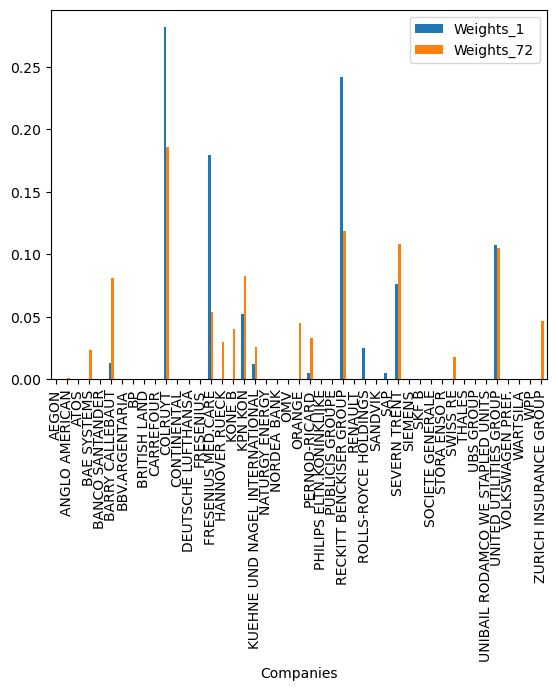

In [39]:
import pandas as pd
import numpy as np

# creating sample data
sample_data = {'Weights_1': pd.DataFrame(optimal_W).T.iloc[:, 0],
               'Weights_72': pd.DataFrame(optimal_W).T.iloc[:, 72]}
df = pd.DataFrame(sample_data)
df.index.name = 'Companies'
df.plot(kind="bar")


Lou-Salomé Vallée: lou-salome.vallee@unil.ch

2022-2023
